### V1535 Sco Spectral Index Work

In [11]:
#imports imports imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#now to get all of the data

In [13]:
data = ([4.5500,	13.6000,	4.1300,	0.1300,	2.6630],
    [7.3800,	13.6000,	2.7860,	0.0850,	2.6630],
    [28.2000,	11.3000,	0.8190,	0.0710,	2.6630],
    [36.5000,	11.3000,	0.6750,	0.0900,	2.6630],
				
    [13.5000,	11.9000,	0.4160,	0.0210,	6.663],
    [17.4000,	11.9000,	0.3440,	0.0240,	6.6630],
    [28.2000,	11.8000,	0.2950,	0.0530,	6.6630],
    [36.5000,	11.8000,	0.3760,	0.0740,	6.6630],
				
    [1.2600,	15.6000,	1.5700,	0.0900,	7.663],
    [1.7400,	15.6000,	1.2100,	0.0810,	7.6630],
    [4.5500,	13.6000,	0.6500,	0.0260,	7.6630],
    [7.3800,	13.6000,	0.4390,	0.0180,	7.6630],
				
    [13.5000,	12.5000,	0.3850,	0.0200,	12.763],
    [17.4000,	12.5000,	0.4560,	0.0240,	12.763],
    [28.2000,	12.4000,	0.7850,	0.0620,	12.763],
    [36.5000,	12.4000,	0.8450,	0.0870,	12.763],
				
    [1.2600,	15.6000,	0.317,	0.1000,	17.663],
    [1.7400,	15.6000,	0.317,	0.0660,	17.663],
    [4.5500,	13.6000,	0.2210,	0.0190,	17.663],
    [7.3800,	13.6000,	0.1920,	0.0170,	17.663],
				
    [13.5000,	12.0000,	0.5850,	0.0240,	23.663],
    [17.4000,	12.0000,	0.7550,	0.0310,	23.663],
    [28.2000,	11.9000,	1.1500,	0.0740,	23.663],
    [36.5000,	11.9000,	1.6800,	0.1100,	23.663],
				
    [1.2600,	15.6000,	0.374,	0.0740,	26.563],
    [1.7400,	15.6000,	0.271,	0.0540,	26.563],
    [4.5500,	13.5000,	0.4550,	0.0230,	26.563],
    [7.3800,	13.5000,	0.5360,	0.0210,	26.563],
				
    [13.5000,	12.0000,	0.2670,	0.0150,	41.583],
    [17.4000,	12.0000,	0.2990,	0.0170,	41.583],
    [28.2000,	12.0000,	0.3480,	0.0440,	41.583],
    [36.5000,	12.0000,	0.351,	0.0550,	41.583],
				
    [1.2600,	15.6000,	0.609,	0.1120,	41.633],
    [1.7400,	15.6000,	0.271,	0.0600,	41.633],
    [4.5500,	13.8000,	0.2220,	0.0170,	41.633],
    [7.3800,	13.8000,	0.2530,	0.0140,	41.633],
				
    [13.5000,	12.5000,	0.4570,	0.0280,	54.563],
    [17.4000,	12.5000,	0.3990,	0.0220,	54.563],
    [28.2000,	12.4000,	0.3230,	0.0470,	54.563],
    [36.5000,	12.4000,	0.2760,	0.0620,	54.563],
				
    [1.2600,	15.7000,	0.8700,	0.1000,	55.733],
    [1.7400,	15.7000,	0.6610,	0.0600,	55.733],
    [4.5500,	13.7000,	0.4830,	0.0240,	55.733],
    [7.3800,	13.7000,	0.3740,	0.0180,	55.733],
				
    [1.2600,	16.6000,	0.4440,	0.0820,	65.513],
    [1.7400,	16.6000,	0.2580,	0.0570,	65.513],
    [4.5500,	14.6000,	0.2560,	0.0190,	65.513],
    [7.3800,	14.6000,	0.2280,	0.0140,	65.513],
				
    [13.5000,	12.0000,	0.2090,	0.0170,	66.493],
    [17.4000,	12.0000,	0.1670,	0.0230,	66.493],
    [28.2000,	12.0000,	0.1730,	0.0490,	66.493],
    [36.5000,	12.0000,	0.289,	0.0830,	66.493],

    [1.2600,	15.6000,	0.32,	0.1100,	78.463],
    [1.7400,	15.6000,	0.378,	0.0710,	78.463],
    [4.5500,	13.6000,	0.1700,	0.0190,	78.463],
    [7.3800,	13.6000,	0.1390,	0.0150,	78.463],

    [13.5000,	12.1000,	0.1290,	0.0170,	78.503],
    [17.4000,	12.1000,	0.1640,	0.0220,	78.503],
    [28.2000,	12.0000,	0.1740,	0.0530,	78.503],
    [36.5000,	12.0000,	0.241,	0.0750,	78.503],

    [1.2600,	8.0000,	0.531,	0.1770,	93.463],
    [1.7400,	8.0000,	0.336,	0.0780,	93.463],
    [4.5500,	8.0000,	0.0727,	0.0230,	93.463],
    [7.3800,	8.0000,	0.0708,	0.0170,	93.463],
    [13.5000,	8.0000,	0.0518,	0.0180,	93.463],
    [16.5000,	8.0000,	0.0859,	0.0210,	93.463],
    [29.5000,	9.0000,	0.149,	0.0360,	93.463],
    [35.0000,	9.0000,	0.135,	0.0450,	93.463],
				
    [1.2600,	8.0000,	0.78,	0.1200,	122.3630],
    [1.7400,	8.0000,	0.233,	0.0780,	122.3630],
    [5.0000,	8.0000,	0.0806,	0.0200,	122.3630],
    [7.0000,	8.0000,	0.111,	0.0220,	122.3630],
    [13.5000,	8.0000,	0.106,	0.0160,	122.3630],
    [16.5000,	8.0000,	0.120,	0.0210,	122.3630],
    [29.5000,	9.0000,	0.264,	0.0450,	122.3630],
    [35.0000,	9.0000,	0.176,	0.0590,	122.3630])

df =  pd.DataFrame(data, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

In [14]:
#splitting it up by day

In [15]:


E1 = ([4.5500,	13.6000,	4.1300,	0.1300,	2.6630],
    [7.3800,	13.6000,	2.7860,	0.0850,	2.6630],
    [28.2000,	11.3000,	0.8190,	0.0710,	2.6630],
    [36.5000,	11.3000,	0.6750,	0.0900,	2.6630],)

E2 = (				
    [13.5000,	11.9000,	0.4160,	0.0210,	6.663],
    [17.4000,	11.9000,	0.3440,	0.0240,	6.6630],
    [28.2000,	11.8000,	0.2950,	0.0530,	6.6630],
    [36.5000,	11.8000,	0.3760,	0.0740,	6.6630],)

E3 = (
    [1.2600,	15.6000,	1.5700,	0.0900,	7.663],
    [1.7400,	15.6000,	1.2100,	0.0810,	7.6630],
    [4.5500,	13.6000,	0.6500,	0.0260,	7.6630],
    [7.3800,	13.6000,	0.4390,	0.0180,	7.6630],)

E4 = (
    [13.5000,	12.5000,	0.3850,	0.0200,	12.763],
    [17.4000,	12.5000,	0.4560,	0.0240,	12.763],
    [28.2000,	12.4000,	0.7850,	0.0620,	12.763],
    [36.5000,	12.4000,	0.8450,	0.0870,	12.763],)

E5 = (				
    [1.2600,	15.6000,	0.317,	0.1000,	17.663],
    [1.7400,	15.6000,	0.317,	0.0660,	17.663],
    [4.5500,	13.6000,	0.2210,	0.0190,	17.663],
    [7.3800,	13.6000,	0.1920,	0.0170,	17.663],)

E6 = (				
    [13.5000,	12.0000,	0.5850,	0.0240,	23.663],
    [17.4000,	12.0000,	0.7550,	0.0310,	23.663],
    [28.2000,	11.9000,	1.1500,	0.0740,	23.663],
    [36.5000,	11.9000,	1.6800,	0.1100,	23.663],)

E7 = (
    [1.2600,	15.6000,	0.374,	0.0740,	26.563],
    [1.7400,	15.6000,	0.271,	0.0540,	26.563],
    [4.5500,	13.5000,	0.4550,	0.0230,	26.563],
    [7.3800,	13.5000,	0.5360,	0.0210,	26.563],)

E8 = (
    [13.5000,	12.0000,	0.2670,	0.0150,	41.583],
    [17.4000,	12.0000,	0.2990,	0.0170,	41.583],
    [28.2000,	12.0000,	0.3480,	0.0440,	41.583],
    [36.5000,	12.0000,	0.351,	0.0550,	41.583],			
    [1.2600,	15.6000,	0.609,	0.1120,	41.633],
    [1.7400,	15.6000,	0.271,	0.0600,	41.633],
    [4.5500,	13.8000,	0.2220,	0.0170,	41.633],
    [7.3800,	13.8000,	0.2530,	0.0140,	41.633],)

E9 = (
    [13.5000,	12.5000,	0.4570,	0.0280,	54.563],
    [17.4000,	12.5000,	0.3990,	0.0220,	54.563],
    [28.2000,	12.4000,	0.3230,	0.0470,	54.563],
    [36.5000,	12.4000,	0.2760,	0.0620,	54.563],)

E10 = (
    [1.2600,	15.7000,	0.8700,	0.1000,	55.733],
    [1.7400,	15.7000,	0.6610,	0.0600,	55.733],
    [4.5500,	13.7000,	0.4830,	0.0240,	55.733],
    [7.3800,	13.7000,	0.3740,	0.0180,	55.733],)

E11 = (
				
    [1.2600,	16.6000,	0.4440,	0.0820,	65.513],
    [1.7400,	16.6000,	0.2580,	0.0570,	65.513],
    [4.5500,	14.6000,	0.2560,	0.0190,	65.513],
    [7.3800,	14.6000,	0.2280,	0.0140,	65.513],)

E12 = (				
    [13.5000,	12.0000,	0.2090,	0.0170,	66.493],
    [17.4000,	12.0000,	0.1670,	0.0230,	66.493],
    [28.2000,	12.0000,	0.1730,	0.0490,	66.493],
    [36.5000,	12.0000,	0.289,	0.0830,	66.493],)


E13 =(
    [1.2600,	15.6000,	0.32,	0.1100,	78.463],
    [1.7400,	15.6000,	0.378,	0.0710,	78.463],
    [4.5500,	13.6000,	0.1700,	0.0190,	78.463],
    [7.3800,	13.6000,	0.1390,	0.0150,	78.463],
    [13.5000,	12.1000,	0.1290,	0.0170,	78.503],
    [17.4000,	12.1000,	0.1640,	0.0220,	78.503],
    [28.2000,	12.0000,	0.1740,	0.0530,	78.503],
    [36.5000,	12.0000,	0.241,	0.0750,	78.503],)

E14 = (
    [1.2600,	8.0000,	0.531,	0.1770,	93.463],
    [1.7400,	8.0000,	0.336,	0.0780,	93.463],
    [4.5500,	8.0000,	0.0727,	0.0230,	93.463],
    [7.3800,	8.0000,	0.0708,	0.0170,	93.463],
    [13.5000,	8.0000,	0.0518,	0.0180,	93.463],
    [16.5000,	8.0000,	0.0859,	0.0210,	93.463],
    [29.5000,	9.0000,	0.149,	0.0360,	93.463],
    [35.0000,	9.0000,	0.135,	0.0450,	93.463],)

E15 = (				
    [1.2600,	8.0000,	0.78,	0.1200,	122.3630],
    [1.7400,	8.0000,	0.233,	0.0780,	122.3630],
    [5.0000,	8.0000,	0.0806,	0.0200,	122.3630],
    [7.0000,	8.0000,	0.111,	0.0220,	122.3630],
    [13.5000,	8.0000,	0.106,	0.0160,	122.3630],
    [16.5000,	8.0000,	0.120,	0.0210,	122.3630],
    [29.5000,	9.0000,	0.264,	0.0450,	122.3630],
    [35.0000,	9.0000,	0.176,	0.0590,	122.3630])

In [16]:
df1 =  pd.DataFrame(E1, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df2 =  pd.DataFrame(E2, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df3 =  pd.DataFrame(E3, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df4 =  pd.DataFrame(E4, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df5 =  pd.DataFrame(E5, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df6 =  pd.DataFrame(E6, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df7 =  pd.DataFrame(E7, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df8 =  pd.DataFrame(E8, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df9 =  pd.DataFrame(E9, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df10 =  pd.DataFrame(E10, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df11 =  pd.DataFrame(E11, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df12 =  pd.DataFrame(E12, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df13 =  pd.DataFrame(E13, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df14 =  pd.DataFrame(E14, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

df15 =  pd.DataFrame(E15, columns = ["Freq (GHz)",	"Time (min)", "Flux Density (mJy)", "Uncertainty (mJy)", "Days Since"])

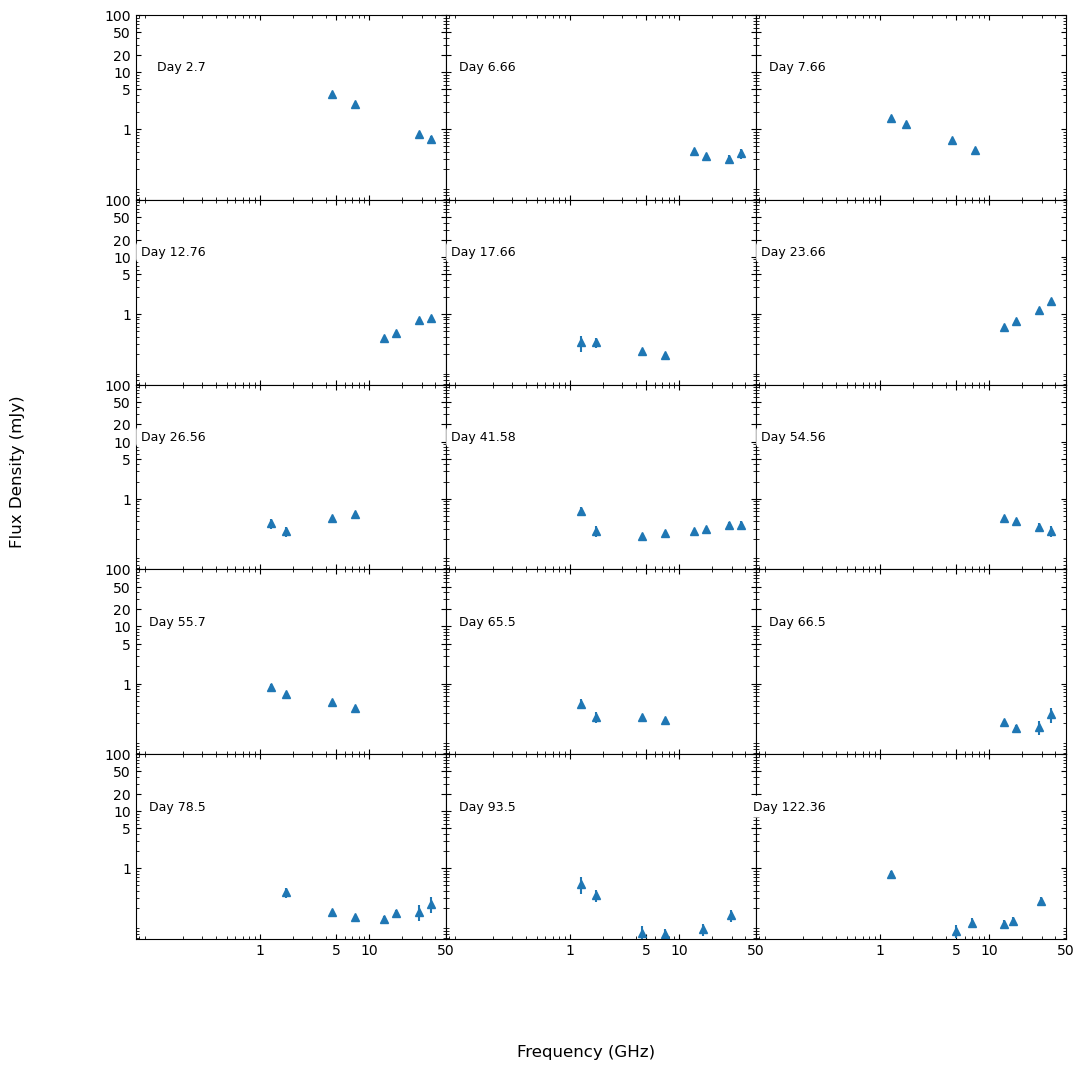

In [17]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,
       df11, df12, df13, df14, df15]


#the days by the list so they can all be defined
annotations = ['Day 2.7', 'Day 6.66', 'Day 7.66', 'Day 12.76', 'Day 17.66', 'Day 23.66',
               'Day 26.56', 'Day 41.58', 'Day 54.56', 'Day 55.7', 'Day 65.5', 'Day 66.5',
               'Day 78.5', 'Day 93.5', 'Day 122.36']

#making the figure (6,4) is the (rows, columns)
fig, ax = plt.subplots(5, 3, sharex='all', sharey='all')
fig.set_size_inches(12, 12)
fig.subplots_adjust(hspace=0, wspace=0)

#loop for each of the datasets
for idx, (df, label) in enumerate(zip(dfs, annotations)):
    row, col = divmod(idx, 3)
    mask = df['Flux Density (mJy)'] > 3 * df['Uncertainty (mJy)'] #don't show the non-detections
    if mask.any():
        ax[row, col].errorbar(df['Freq (GHz)'][mask], df['Flux Density (mJy)'][mask], yerr=df['Uncertainty (mJy)'][mask], fmt='^')
        ax[row, col].set_xscale('log')
        ax[row, col].set_yscale('log')
        ax[row, col].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
        ax[row, col].set_yticks([1, 5, 10, 20, 50, 100], labels=['1', '5', '10', '20', '50', '100'])
        ax[row, col].annotate(label, xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
        ax[row, col].tick_params(axis='both', which='both', direction='in', top=True, right=True)

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
plt.show();